

### Table of Contents

## Questions 

1. [What type of developers are among top trends of recents years? How has it been varying year by year since 2017?](#q1)
2. [Which programming languages have been most popular according to last 4 years' survey?](#q2)
3. [What are the popular programming languages for Linux, Mac and Windows operating system users on 2020?](#q3)
4. [Is there any pattern in the way people prefer using a platform with a programming language, database, or a framework? What
   about a platform for a particular developer type?](#q4)

## [Data understanding](#data%20understanding)

## [Data preparation](#datapreparation)
   - [Data preparation 1](#datapreparation1)
   - [Data preparation 2](#datapreparation2)
   - [Data preparation 3](#datapreparation3)
   - [Data preparation 4](#datapreparation4)   

## Answers/Visualization

   - [Solution 1](#a1)
   - [Solution 2](#a2)
   - [Solution 3](#a3)
   - [Solution 4](#a4)


## Data understanding <a name="data%20understanding"></a>
[Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey) is used as reference for analysing and answering the questions. Analysis is done on the last 4 years of survey data (between 2017 and 2020). 

Relevent data is prepared and formatted for analysis in each question separately. For instance 'DeveloperType' (and/or usually called 'DevType' in these surveys) trend is analysed. As another example, popular programming languages ('LanguageWorkedWith' or 'HaveWorkedLanguage' as for 2017 survey) for each year is analysed.

Trends over years require specific categories hence there won't be any modelling or prediction in this project.

Answers are provided using inferential statistics.

Data are stored [here](data) in a folder named "data". Each survey are located in folders with year name. In the "data preparation" section of each question, overview of related data is presented and preparation process is demonstrated.

## Data preparation <a name="datapreparation"></a>

Here all data are loaded from data directory. Each survey is a __csv__ format file.

Dataframes are called dfxx where xx is the year digit.

In [1]:
# first necessary libraries imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# survey data are stored in separate directories for each year. To make it easy to read every year is denoted as two digits like
# dfxx is the corresponding dataframe for year xx.

df17 = pd.read_csv('./data/2017/survey_results_public.csv')
df18 = pd.read_csv('./data/2018/survey_results_public.csv')
df19 = pd.read_csv('./data/2019/survey_results_public.csv')
df20 = pd.read_csv('./data/2020/survey_results_public.csv')

### Question 1 <a name="q1" ></a>: Developer Type trends of 4 years

### data preparation <a name="datapreparation1"></a>

Except 2017, in the rest of surveys datasets developer type is shortened as 'DevType'.
Now, mixed amount of developer type could be demonstrated directly by counting unique values of 
each group. it is not obvious to see the exact number of each developer type because of multiple answers provided by each developer. 

In [3]:
df17['DeveloperType'].value_counts().head()

Web developer                                    10683
Web developer; Desktop applications developer     1849
Mobile developer                                  1556
Web developer; Mobile developer                   1503
Desktop applications developer                    1433
Name: DeveloperType, dtype: int64

In [4]:
df18.DevType.value_counts().head()

Back-end developer                                             6417
Full-stack developer                                           6104
Back-end developer;Front-end developer;Full-stack developer    4460
Mobile developer                                               3518
Student                                                        3222
Name: DevType, dtype: int64

In [5]:
df19.DevType.value_counts().head()

Developer, full-stack                                             8433
Developer, back-end                                               4913
Developer, back-end;Developer, front-end;Developer, full-stack    2399
Developer, front-end                                              2212
Developer, mobile                                                 2172
Name: DevType, dtype: int64

In [6]:
df20.DevType.value_counts().head()

Developer, full-stack                                             4424
Developer, back-end                                               3086
Developer, back-end;Developer, front-end;Developer, full-stack    2227
Developer, back-end;Developer, full-stack                         1476
Developer, front-end                                              1401
Name: DevType, dtype: int64

Cleaning up and countign each type separately results readily understandable data.

The column of interest in each of dataframes is the 'Developer Type'. Each row contains ";" separated srings.

Function (below) called __split_strip()__ cleans and formats string columns as desired. This function will be used for further formattings of other categorical columns.

In [7]:
# a function that formats the input string.

def split_strip(x):
    """
    args: 
    x-string
    
    x is splitted from semicolons first.
    Then left side extra (possible) spaces are stripped.
    
    input: 
    x
    
    output:
    list of cleaned, striped, and splitted string
    
    
    """
    return list(y.lstrip() for y in x.split(';'))

#### Developer type 2017
DataFrame's 'apply' method is used together with this function in order to get clean dataframe. 'Explode' method though transform each element of the result list to a row.

<AxesSubplot:>

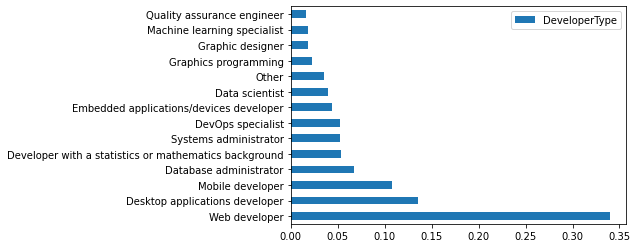

In [8]:
# df_dt representing a dataframe of developertype for each year separately.
# Rhe process below diplays the proportion of each type from highest to lowest.

df17_dt = df17.set_index(['Respondent']).dropna(subset=['DeveloperType'], axis=0).DeveloperType.apply(split_strip).explode().reset_index()
df17_dt_plot= pd.DataFrame(df17_dt.DeveloperType.value_counts()/df17_dt.DeveloperType.value_counts().sum())
df17_dt_plot.plot.barh()

The process above could be repeated for next 3 years of datasets.

#### Developer type 2018

<AxesSubplot:>

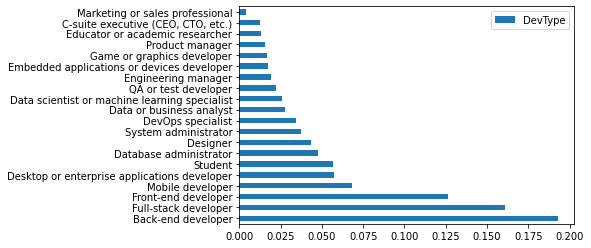

In [9]:
df18_dt = df18.set_index(['Respondent']).dropna(subset=['DevType'], axis=0).DevType.apply(split_strip).explode().reset_index()
df18_dt_plot= pd.DataFrame(df18_dt.DevType.value_counts()/df18_dt.DevType.value_counts().sum())
df18_dt_plot.plot.barh()

#### Developer type 2019

<AxesSubplot:>

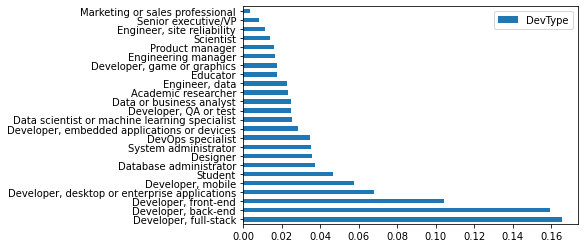

In [10]:
df19_dt = df19.set_index(['Respondent']).dropna(subset=['DevType'], axis=0).DevType.apply(split_strip).explode().reset_index()
df19_dt_plot= pd.DataFrame(df19_dt.DevType.value_counts()/df19_dt.DevType.value_counts().sum())
df19_dt_plot.plot.barh()

#### Developer type 2020

<AxesSubplot:>

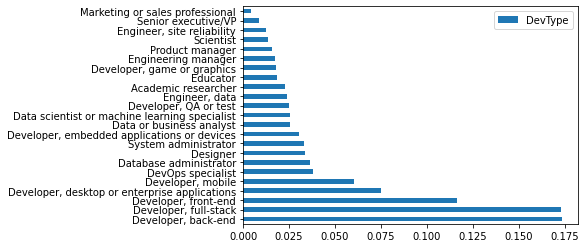

In [11]:
df20_dt = df20.set_index(['Respondent']).dropna(subset=['DevType'], axis=0).DevType.apply(split_strip).explode().reset_index()
df20_dt_plot = pd.DataFrame(df20_dt.DevType.value_counts()/df20_dt.DevType.value_counts().sum())
df20_dt_plot.plot.barh()

### Results summary

In [110]:
df17_dt_plot.head(3)

,DeveloperType
Web developer,0.339572
Desktop applications developer,0.135065
Mobile developer,0.107767


In [109]:
df18_dt_plot.head(3)

,DevType
Back-end developer,0.193043
Full-stack developer,0.160638
Front-end developer,0.126119


In [108]:
df19_dt_plot.head(3)

,DevType
"Developer, full-stack",0.165649
"Developer, back-end",0.159540
"Developer, front-end",0.104551


In [111]:
df20_dt_plot.head(3)

,DevType
"Developer, back-end",0.173323
"Developer, full-stack",0.172667
"Developer, front-end",0.116465


### Answer 1<a name="a1" ></a>: Developer Type trends of 4 years

According to results above, here are the most popular development types of each year:

__2017: Web, Desktop applications, Mobile Developer__

__2018: Back-End, Full-Stack, Front-End Developer__

__2019: Full-Stack, Back-End, Front-End Developer__

__2020: Back-End, Full-Stack, Front-End Developer__

The results above indicates that web-developement including __front-stack__ and __back-stack__ together with __full-stack__ are top trends.

### Question 2<a name="q2"></a>: Popular programming languages between 2017 and 2020

### data preparation <a name="datapreparation2"></a>

2017, notion of 'LanguageWorkedWith' (in the rest of surveys) is named 'HaveWorkedLanguage'.
Now, mixed amount of developer type could be demonstrated directly by counting unique values of each group. But since each respondent has provided multiple answers, the output without formatting is not understandable and countable directly. 

Previously defined formatting function ('split_strip') could be applied on categorical columns of interest.

In [12]:
df17['HaveWorkedLanguage'].value_counts().head()

C#; JavaScript; SQL     1276
JavaScript; PHP; SQL    1143
Java                     913
JavaScript               807
JavaScript; PHP          662
Name: HaveWorkedLanguage, dtype: int64

In [13]:
df18.LanguageWorkedWith.value_counts().head()

C#;JavaScript;SQL;HTML;CSS               1347
JavaScript;PHP;SQL;HTML;CSS              1235
Java                                     1030
JavaScript;HTML;CSS                       881
C#;JavaScript;SQL;TypeScript;HTML;CSS     828
Name: LanguageWorkedWith, dtype: int64

In [14]:
df19.LanguageWorkedWith.value_counts().head()

HTML/CSS;JavaScript;PHP;SQL              1483
C#;HTML/CSS;JavaScript;SQL               1414
HTML/CSS;JavaScript                      1247
C#;HTML/CSS;JavaScript;SQL;TypeScript     990
Java                                      934
Name: LanguageWorkedWith, dtype: int64

In [15]:
df20.LanguageWorkedWith.value_counts().head()

HTML/CSS;JavaScript;PHP;SQL              1073
HTML/CSS;JavaScript                       900
C#;HTML/CSS;JavaScript;SQL                856
C#;HTML/CSS;JavaScript;SQL;TypeScript     754
HTML/CSS;JavaScript;TypeScript            697
Name: LanguageWorkedWith, dtype: int64

As we can see from raw counts, every developer has been working with multiple languages hence extra cleaning and separation of data is needed.
Similar to previous question, first NAN rows are dropped using dropna.
Each row in the 'LanguagesWorkedWith' column is a mixed string separated with ";" and possibly extra spaces.

Cleaning could be achieved by simply applying 'split_strip' function on related Language category columns in each dataset.

For this categorical data it is wise to remove NAN values since we are only interested in sum of each category counts.

#### Programming language 2017

<AxesSubplot:>

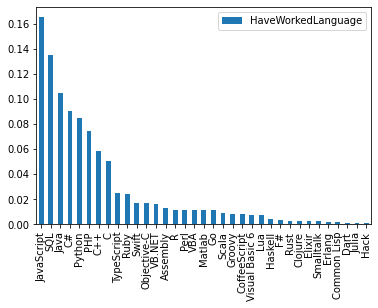

In [16]:
df17_lang = df17.set_index(['Respondent']).dropna(subset=['HaveWorkedLanguage'], axis=0).HaveWorkedLanguage.apply(split_strip).explode().reset_index()
df17_lang_plot= pd.DataFrame(df17_lang.HaveWorkedLanguage.value_counts()/df17_lang.HaveWorkedLanguage.value_counts().sum())
df17_lang_plot.plot.bar()

#### Programming language 2018

<AxesSubplot:>

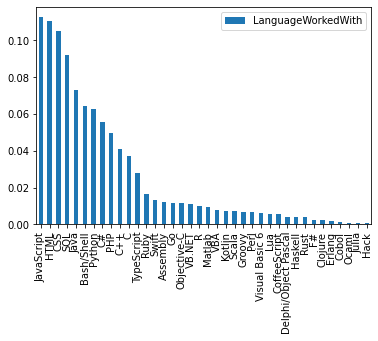

In [17]:
df18_lang = df18.set_index(['Respondent']).dropna(subset=['LanguageWorkedWith'], axis=0).LanguageWorkedWith.apply(split_strip).explode().reset_index()
df18_lang_plot= pd.DataFrame(df18_lang.LanguageWorkedWith.value_counts()/df18_lang.LanguageWorkedWith.value_counts().sum())
df18_lang_plot.plot.bar()

#### Programming language 2019

<AxesSubplot:>

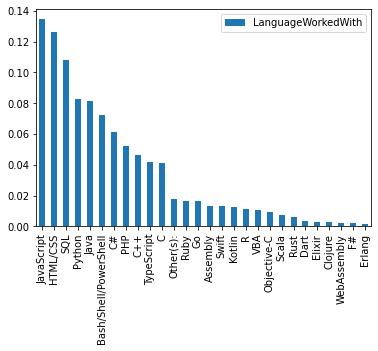

In [18]:
df19_lang = df19.set_index(['Respondent']).dropna(subset=['LanguageWorkedWith'], axis=0).LanguageWorkedWith.apply(split_strip).explode().reset_index()
df19_lang_plot= pd.DataFrame(df19_lang.LanguageWorkedWith.value_counts()/df19_lang.LanguageWorkedWith.value_counts().sum())
df19_lang_plot.plot.bar()

#### Programming language 2020

<AxesSubplot:>

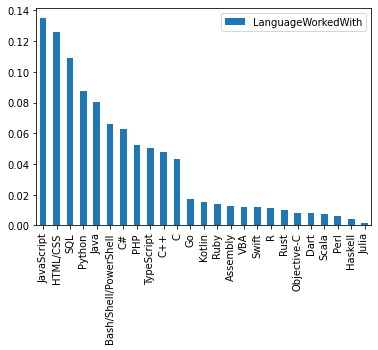

In [19]:
df20_lang = df20.set_index(['Respondent']).dropna(subset=['LanguageWorkedWith'], axis=0).LanguageWorkedWith.apply(split_strip).explode().reset_index()
df20_lang_plot= pd.DataFrame(df20_lang.LanguageWorkedWith.value_counts()/df20_lang.LanguageWorkedWith.value_counts().sum())
df20_lang_plot.plot.bar()

### Answer 2<a name="a2"></a>: Programming language trends between 2017 and 2020


__2017: JavaScript, SQL, Java, C#, Python__

__2018: JavaScript, HTML, CSS, SQL, Java__

__2019: JavaScript, HTML/CSS, SQL, Python, Java__

__2020: JavaScript, HTML/CSS, SQL, Python, Java__

### Question 3<a name="q3"></a>: Popular programming langugage of Linux users vs MS-Windows users

### data preparation <a name="datapreparation3"></a>

In addition to programming language popularity, here we would like to see it looks like when it comes to both operatin gsystems and language together.

Again NAN values are removed from rows that are the subject of the question.

Formatting using 'split_strip' function together with 'apply' method of pandas will result a cell with list of formatted strings. Then 'explode' is used to transform these string cells into separate rows in the same dataframe. 

Here's how the code and results look like.

In [20]:
df_os_lang = df20[["LanguageWorkedWith","OpSys"]].dropna(how='any')
df_os_lang = df_os_lang.assign(LanguageWorkedWith=df_os_lang['LanguageWorkedWith'].apply(split_strip)).explode('LanguageWorkedWith').reset_index(drop=True)
df_os_lang.head()

,LanguageWorkedWith,OpSys
0,C#,Windows
1,HTML/CSS,Windows
2,JavaScript,Windows
3,JavaScript,MacOS
4,Swift,MacOS


In [21]:
df_os_lang_plot = df_os_lang.value_counts(['OpSys', 'LanguageWorkedWith']).head(20)
df_os = pd.DataFrame(df_os_lang_plot)
# df_os.loc['Linux-based',:]
mac_users = pd.DataFrame({'Mac' : df_os_lang_plot.loc['MacOS',:]}).head()
linux_users = pd.DataFrame({'Linux' : df_os_lang_plot.loc['Linux-based',:]}).head()
win_users = pd.DataFrame({'Windows' : df_os_lang_plot.loc['Windows',:]}).head()

### Answer 3<a name="a3"></a>: Programming languages for  Linux, Windows, and Mac users on 2020

<AxesSubplot:xlabel='LanguageWorkedWith'>

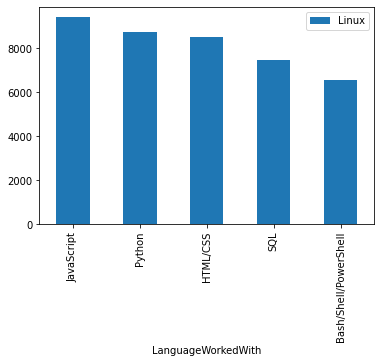

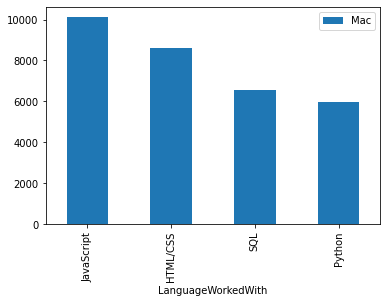

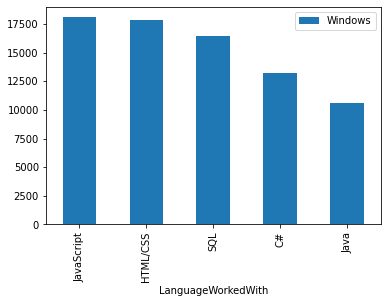

In [22]:
linux_users.plot.bar()
mac_users.plot.bar()
win_users.plot.bar()

### Question 4<a name="q4"></a>: between 2017 and 2020, trends of using a __Platform__ in combination with:
#### Programming language, Database, Framework, Developer type

The target data related to this question are located on columns of:
\['Respondent', 'DeveloperType', 'HaveWorkedPlatform', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase'\]. 

In order to keep column names consistent with all datasets, 2017 dataset columns because of different naming convention could be renamed.

'Nan' types could be safely removed because we are only interested in the count of categories. This process is done once per year data from 2017 till 2020. 

Selected two column combinations for every year data (2017-2020) are:

platform-database, 

platform-language,

platform-devtype,

platform-framework.

It means from 6 columns above, two by two will be formatted and counted while one of two stays always as 'platform'.

### 2017 and data preparation <a name="datapreparation4"></a>

Dataframes are suffixed with year number plus underscore and number of selected columns. 

This means 'df17_6col' means dataframe from 2017 and selecting 6 interesting columns needed to answer the question.

In [23]:
df17_6col = df17.dropna(subset=['Respondent', 'DeveloperType', 'HaveWorkedPlatform', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase'], axis=0)
df17_6col = df17_6col[[ 'Respondent', 'DeveloperType', 'HaveWorkedPlatform', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase']]

# Columns are renamed to keep them consistent among all years data. 2017 uses different notion.
newColumns= list(('DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'FrameworkWorkedWith', 'DatabaseWorkedWith'))
oldColumns= list(('DeveloperType', 'HaveWorkedPlatform', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase'))

df17_6col.rename(columns=dict(zip(oldColumns, newColumns)), inplace=True)

df17_6col.head()

,Respondent,DevType,PlatformWorkedWith,LanguageWorkedWith,FrameworkWorkedWith,DatabaseWorkedWith
7,8,Web developer,Amazon Web Services (AWS),CoffeeScript; Clojure; Elixir; Erlang; Haskell...,React,Redis; MySQL; PostgreSQL
8,9,Web developer; Mobile developer,Android; Microsoft Azure,C#; JavaScript,AngularJS; Node.js; .NET Core,SQL Server
13,14,Web developer,Amazon Web Services (AWS),Java; JavaScript; Ruby; SQL,React,Redis; MySQL; PostgreSQL
17,18,Web developer; Embedded applications/devices d...,Linux Desktop; Amazon Web Services (AWS),C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,React,MySQL; PostgreSQL; Oracle
21,22,Web developer; Mobile developer; Desktop appli...,Windows Phone; Windows Desktop; Raspberry Pi; ...,C#; JavaScript; SQL,AngularJS,SQL Server


Since every two combination of columns are needed, for simplicity only two columns of previously cleaned dataset will be used. To analyse platform and programming language combination, we will need exactly these two columns from cleaned database.

There is two columns with multiple answers in every cell in this case. So the process of formatting (using 'split_strip' function) togther with 'apply' and 'explode' methods will be repeated for two columns sequentially.

This process is repeated for each of two combinations for every year.

### 2017

### platform-language

In [24]:
df17_plat_lang = df17_6col[["LanguageWorkedWith","PlatformWorkedWith"]]
df17_plat_lang = df17_plat_lang.assign(PlatformWorkedWith=df17_plat_lang['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df17_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Amazon Web Services (AWS)
1,C#; JavaScript,Android
2,C#; JavaScript,Microsoft Azure
3,Java; JavaScript; Ruby; SQL,Amazon Web Services (AWS)
4,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,Linux Desktop


As we can see above, platform column is formatted and exploded properly.

To be able to find the right combination of tow columns, we need to format and separate language column too.

The same process is done below on the second column which is language.

In [25]:
df17_plat_lang = df17_plat_lang.assign(LanguageWorkedWith=df17_plat_lang['LanguageWorkedWith'].apply(split_strip)).explode('LanguageWorkedWith').reset_index(drop=True)
df17_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,CoffeeScript,Amazon Web Services (AWS)
1,Clojure,Amazon Web Services (AWS)
2,Elixir,Amazon Web Services (AWS)
3,Erlang,Amazon Web Services (AWS)
4,Haskell,Amazon Web Services (AWS)


Now both columns are formatted and exploded correctly. It is time to count each combination of languages and platforms. Then the first part of the question for specified year will be answered.

We are interested in grouping two cloumns together hence groupby is useful here. But there are only two columns chosen for this part hence there is no column left to carry out the 'count' on it. This is why 'size' is used instead.

After resetting the index, we can sort count values to get the final result.

In [26]:
df17_plat_lang = pd.DataFrame({'Count' : df17_plat_lang.groupby( [ 'PlatformWorkedWith', 'LanguageWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df17_plat_lang.head()

,PlatformWorkedWith,LanguageWorkedWith,Count
0,Amazon Web Services (AWS),JavaScript,4204
1,Windows Desktop,JavaScript,3804
2,Windows Desktop,SQL,3567
3,Windows Desktop,C#,3501
4,Android,JavaScript,3246


To make it easier to answer the question, quantile is helpful in order to find the top x (here top %5) percent of the result (as shown in nex cell)

<AxesSubplot:ylabel='PlatformWorkedWith,LanguageWorkedWith'>

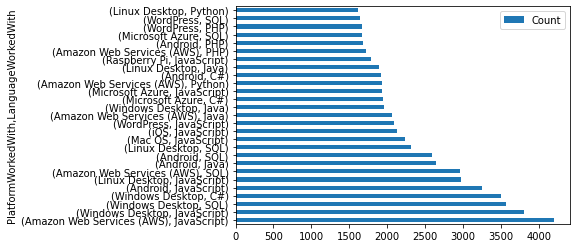

In [27]:
df17_plat_lang[df17_plat_lang.Count > df17_plat_lang.Count.quantile(0.950)].set_index([ 'PlatformWorkedWith', 'LanguageWorkedWith']).plot.barh()

From this cell onwards, the same logic applies to every year data and with combinations of columns below:

platform-database, 

platform-language,

platform-devtype,

platform-framework.

### 2017

### platform-database

In [28]:
df17_plat_db = df17_6col[["DatabaseWorkedWith","PlatformWorkedWith"]]
df17_plat_db = df17_plat_db.assign(PlatformWorkedWith=df17_plat_db['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df17_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS)
1,SQL Server,Android
2,SQL Server,Microsoft Azure
3,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS)
4,MySQL; PostgreSQL; Oracle,Linux Desktop


In [29]:
df17_plat_db = df17_plat_db.assign(DatabaseWorkedWith=df17_plat_db['DatabaseWorkedWith'].apply(split_strip)).explode('DatabaseWorkedWith').reset_index(drop=True)
df17_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Redis,Amazon Web Services (AWS)
1,MySQL,Amazon Web Services (AWS)
2,PostgreSQL,Amazon Web Services (AWS)
3,SQL Server,Android
4,SQL Server,Microsoft Azure


In [30]:
df17_plat_db = pd.DataFrame({'Count' : df17_plat_db.groupby( [ 'PlatformWorkedWith', 'DatabaseWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df17_plat_db.head()

,PlatformWorkedWith,DatabaseWorkedWith,Count
0,Windows Desktop,SQL Server,3213
1,Amazon Web Services (AWS),MySQL,2995
2,Android,MySQL,2600
3,Windows Desktop,MySQL,2538
4,Linux Desktop,MySQL,2432


<AxesSubplot:ylabel='PlatformWorkedWith,DatabaseWorkedWith'>

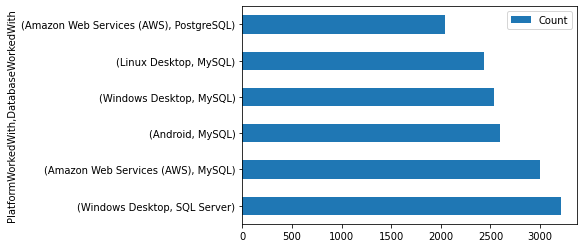

In [31]:
df17_plat_db[df17_plat_db.Count > df17_plat_db.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'DatabaseWorkedWith']).plot.barh()

### 2017

### platform-Framework

In [32]:
df17_plat_fw = df17_6col[["FrameworkWorkedWith","PlatformWorkedWith"]]
df17_plat_fw = df17_plat_fw.assign(PlatformWorkedWith=df17_plat_fw['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df17_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,React,Amazon Web Services (AWS)
1,AngularJS; Node.js; .NET Core,Android
2,AngularJS; Node.js; .NET Core,Microsoft Azure
3,React,Amazon Web Services (AWS)
4,React,Linux Desktop


In [33]:
df17_plat_fw = df17_plat_fw.assign(FrameworkWorkedWith=df17_plat_fw['FrameworkWorkedWith'].apply(split_strip)).explode('FrameworkWorkedWith').reset_index(drop=True)
df17_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,React,Amazon Web Services (AWS)
1,AngularJS,Android
2,Node.js,Android
3,.NET Core,Android
4,AngularJS,Microsoft Azure


In [34]:
df17_plat_fw= pd.DataFrame({'Count' : df17_plat_fw.groupby(['PlatformWorkedWith', 'FrameworkWorkedWith']).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df17_plat_fw.head()

,PlatformWorkedWith,FrameworkWorkedWith,Count
0,Amazon Web Services (AWS),Node.js,2938
1,Windows Desktop,.NET Core,2756
2,Amazon Web Services (AWS),AngularJS,2544
3,Windows Desktop,AngularJS,2175
4,Linux Desktop,Node.js,2081


<AxesSubplot:ylabel='PlatformWorkedWith,FrameworkWorkedWith'>

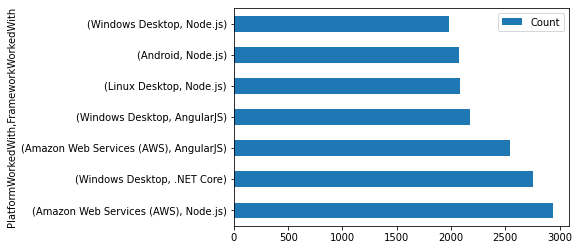

In [35]:
df17_plat_fw[df17_plat_fw.Count > df17_plat_fw.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'FrameworkWorkedWith']).plot.barh()

### 2017

### platform-DeveloperType

In [36]:
df17_plat_dt = df17_6col[["DevType","PlatformWorkedWith"]]
df17_plat_dt = df17_plat_dt.assign(PlatformWorkedWith=df17_plat_dt['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df17_plat_dt.head()

,DevType,PlatformWorkedWith
0,Web developer,Amazon Web Services (AWS)
1,Web developer; Mobile developer,Android
2,Web developer; Mobile developer,Microsoft Azure
3,Web developer,Amazon Web Services (AWS)
4,Web developer; Embedded applications/devices d...,Linux Desktop


In [37]:
df17_plat_dt = df17_plat_dt.assign(DevType=df17_plat_dt['DevType'].apply(split_strip)).explode('DevType').reset_index(drop=True)
df17_plat_dt.head()

,DevType,PlatformWorkedWith
0,Web developer,Amazon Web Services (AWS)
1,Web developer,Android
2,Mobile developer,Android
3,Web developer,Microsoft Azure
4,Mobile developer,Microsoft Azure


In [38]:
df17_plat_dt = pd.DataFrame({'Count' : df17_plat_dt.groupby( [ 'PlatformWorkedWith', 'DevType'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df17_plat_dt.head()

,PlatformWorkedWith,DevType,Count
0,Amazon Web Services (AWS),Web developer,4204
1,Windows Desktop,Web developer,3803
2,Android,Web developer,3177
3,Linux Desktop,Web developer,2921
4,Windows Desktop,Desktop applications developer,2844


<AxesSubplot:ylabel='PlatformWorkedWith,DevType'>

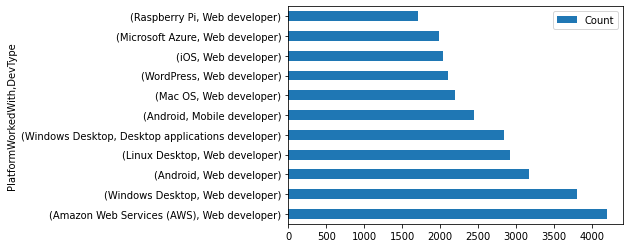

In [39]:
df17_plat_dt[df17_plat_dt.Count > df17_plat_dt.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'DevType']).plot.barh()

### 2018 and data preparation

Dataframes are suffixed with year number plus underscore and number of selected columns. 

This means 'df18_6col' means dataframe from 2018 and selecting 6 interesting columns needed to answer the question.

In [40]:
df18_6col = df18.dropna(subset=['Respondent', 'DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'FrameworkWorkedWith', 'DatabaseWorkedWith'], axis=0)
df18_6col = df18_6col[[ 'Respondent', 'DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'FrameworkWorkedWith', 'DatabaseWorkedWith']]
df18_6col.head()

,Respondent,DevType,PlatformWorkedWith,LanguageWorkedWith,FrameworkWorkedWith,DatabaseWorkedWith
0,1,Full-stack developer,AWS;Azure;Linux;Firebase,JavaScript;Python;HTML;CSS,Django;React,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...
1,3,Database administrator;DevOps specialist;Full-...,Linux,JavaScript;Python;Bash/Shell,Django,Redis;PostgreSQL;Memcached
5,8,Back-end developer;Database administrator;Fron...,Linux,Java;JavaScript;Python;TypeScript;HTML;CSS,Angular;Node.js,MongoDB
6,9,Back-end developer;Front-end developer;Full-st...,Linux,JavaScript;HTML;CSS,Node.js;React,MongoDB
7,10,Designer;Front-end developer;QA or test developer,Azure;Heroku,JavaScript;TypeScript;HTML;CSS,Angular;Node.js,"MongoDB;MySQL;Microsoft Azure (Tables, CosmosD..."


### 2018

### platform-language

In [41]:
df18_plat_lang = df18_6col[["LanguageWorkedWith","PlatformWorkedWith"]]
df18_plat_lang = df18_plat_lang.assign(PlatformWorkedWith=df18_plat_lang['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df18_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,JavaScript;Python;HTML;CSS,AWS
1,JavaScript;Python;HTML;CSS,Azure
2,JavaScript;Python;HTML;CSS,Linux
3,JavaScript;Python;HTML;CSS,Firebase
4,JavaScript;Python;Bash/Shell,Linux


In [42]:
df18_plat_lang = df18_plat_lang.assign(LanguageWorkedWith=df18_plat_lang['LanguageWorkedWith'].apply(split_strip)).explode('LanguageWorkedWith').reset_index(drop=True)
df18_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,JavaScript,AWS
1,Python,AWS
2,HTML,AWS
3,CSS,AWS
4,JavaScript,Azure


In [43]:
df18_plat_lang = pd.DataFrame({'Count' : df18_plat_lang.groupby( [ 'PlatformWorkedWith', 'LanguageWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df18_plat_lang.head()

,PlatformWorkedWith,LanguageWorkedWith,Count
0,Linux,JavaScript,17399
1,Linux,HTML,16429
2,Linux,CSS,15878
3,Linux,SQL,14344
4,Linux,Bash/Shell,13170


<AxesSubplot:ylabel='PlatformWorkedWith,LanguageWorkedWith'>

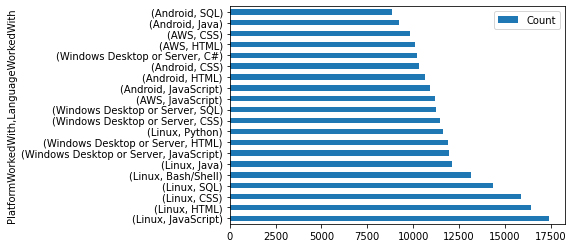

In [44]:
df18_plat_lang[df18_plat_lang.Count > df18_plat_lang.Count.quantile(0.980)].set_index([ 'PlatformWorkedWith', 'LanguageWorkedWith']).plot.barh()

### 2018

### platform-database

In [45]:
df18_plat_db = df18_6col[["DatabaseWorkedWith","PlatformWorkedWith"]]
df18_plat_db = df18_plat_db.assign(PlatformWorkedWith=df18_plat_db['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df18_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS
1,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Azure
2,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Linux
3,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Firebase
4,Redis;PostgreSQL;Memcached,Linux


In [46]:
df18_plat_db = df18_plat_db.assign(DatabaseWorkedWith=df18_plat_db['DatabaseWorkedWith'].apply(split_strip)).explode('DatabaseWorkedWith').reset_index(drop=True)
df18_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Redis,AWS
1,SQL Server,AWS
2,MySQL,AWS
3,PostgreSQL,AWS
4,Amazon RDS/Aurora,AWS


In [47]:
df18_plat_db = pd.DataFrame({'Count' : df18_plat_db.groupby( [ 'PlatformWorkedWith', 'DatabaseWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df18_plat_db.head()

,PlatformWorkedWith,DatabaseWorkedWith,Count
308,Linux,MySQL,13920
311,Linux,PostgreSQL,10083
481,Windows Desktop or Server,SQL Server,10045
56,Android,MySQL,9064
476,Windows Desktop or Server,MySQL,8485


<AxesSubplot:ylabel='PlatformWorkedWith,DatabaseWorkedWith'>

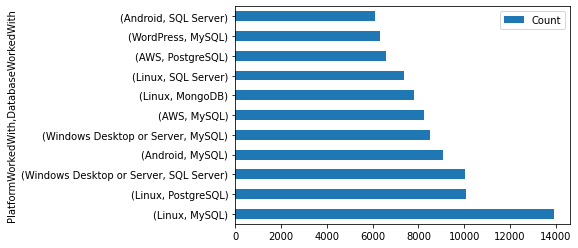

In [48]:
df18_plat_db[df18_plat_db.Count > df18_plat_db.Count.quantile(0.98)].set_index([ 'PlatformWorkedWith', 'DatabaseWorkedWith']).plot.barh()

### 2018

### platform-Framework

In [49]:
df18_plat_fw = df18_6col[["FrameworkWorkedWith","PlatformWorkedWith"]]
df18_plat_fw = df18_plat_fw.assign(PlatformWorkedWith=df18_plat_fw['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df18_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,Django;React,AWS
1,Django;React,Azure
2,Django;React,Linux
3,Django;React,Firebase
4,Django,Linux


In [50]:
df18_plat_fw = df18_plat_fw.assign(FrameworkWorkedWith=df18_plat_fw['FrameworkWorkedWith'].apply(split_strip)).explode('FrameworkWorkedWith').reset_index(drop=True)
df18_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,Django,AWS
1,React,AWS
2,Django,Azure
3,React,Azure
4,Django,Linux


In [51]:
df18_plat_fw= pd.DataFrame({'Count' : df18_plat_fw.groupby(['PlatformWorkedWith', 'FrameworkWorkedWith']).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df18_plat_fw.head()

,PlatformWorkedWith,FrameworkWorkedWith,Count
0,Linux,Node.js,11593
1,AWS,Node.js,7921
2,Linux,Angular,7726
3,Windows Desktop or Server,.NET Core,7721
4,Android,Node.js,7385


<AxesSubplot:ylabel='PlatformWorkedWith,FrameworkWorkedWith'>

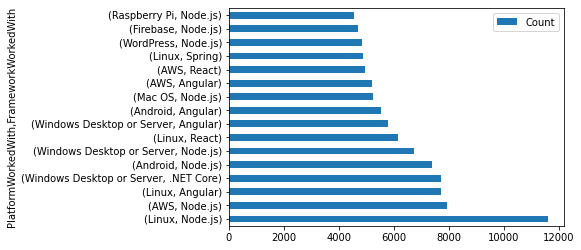

In [52]:
df18_plat_fw[df18_plat_fw.Count > df18_plat_fw.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'FrameworkWorkedWith']).plot.barh()

### 2018

### platform-devtype

In [53]:
df18_plat_dt = df18_6col[["DevType","PlatformWorkedWith"]]
df18_plat_dt = df18_plat_dt.assign(PlatformWorkedWith=df18_plat_dt['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df18_plat_dt.head()

,DevType,PlatformWorkedWith
0,Full-stack developer,AWS
1,Full-stack developer,Azure
2,Full-stack developer,Linux
3,Full-stack developer,Firebase
4,Database administrator;DevOps specialist;Full-...,Linux


In [54]:
df18_plat_dt = df18_plat_dt.assign(DevType=df18_plat_dt['DevType'].apply(split_strip)).explode('DevType').reset_index(drop=True)
df18_plat_dt.head()

,DevType,PlatformWorkedWith
0,Full-stack developer,AWS
1,Full-stack developer,Azure
2,Full-stack developer,Linux
3,Full-stack developer,Firebase
4,Database administrator,Linux


In [55]:
df18_plat_dt = pd.DataFrame({'Count' : df18_plat_dt.groupby( [ 'PlatformWorkedWith', 'DevType'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df18_plat_dt.head()

,PlatformWorkedWith,DevType,Count
280,Linux,Back-end developer,15308
292,Linux,Full-stack developer,12944
440,Windows Desktop or Server,Back-end developer,10378
452,Windows Desktop or Server,Full-stack developer,9205
0,AWS,Back-end developer,9200


<AxesSubplot:ylabel='PlatformWorkedWith,DevType'>

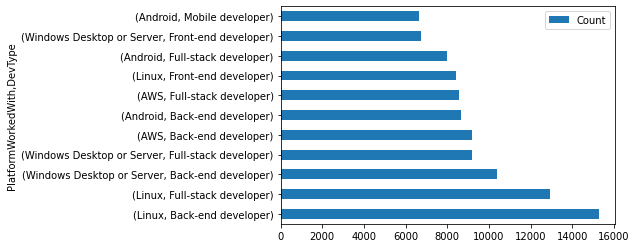

In [56]:
df18_plat_dt[df18_plat_dt.Count > df18_plat_dt.Count.quantile(0.98)].set_index([ 'PlatformWorkedWith', 'DevType']).plot.barh()

### 2019 and data preparation

Dataframes are suffixed with year number plus underscore and number of selected columns. 

This means 'df19_6col' means dataframe from 2019 and selecting 6 interesting columns needed to answer the question.

In [57]:
df19_6col = df19.dropna(subset=['Respondent', 'DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'WebFrameWorkedWith', 'DatabaseWorkedWith'], axis=0)
df19_6col = df19_6col[[ 'Respondent', 'DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'WebFrameWorkedWith', 'DatabaseWorkedWith']]

df19_6col.rename(columns= {'WebFrameWorkedWith': 'FrameworkWorkedWith'}, inplace=True)
df19_6col.head()

,Respondent,DevType,PlatformWorkedWith,LanguageWorkedWith,FrameworkWorkedWith,DatabaseWorkedWith
4,5,"Academic researcher;Developer, desktop or ente...",Android;Linux;MacOS;Slack;Windows,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Django;Express;Flask;jQuery;React.js;Spring,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite
7,8,"Developer, back-end;Engineer, site reliability",AWS;Docker;Heroku;Linux;MacOS;Slack,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Express;Flask;React.js;Spring,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...
8,9,"Database administrator;Developer, back-end;Dev...",AWS;Docker;Heroku;Linux;MacOS;Slack,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Express;Ruby on Rails;Other(s):,DynamoDB;PostgreSQL;SQLite
9,10,Data or business analyst;Data scientist or mac...,Linux;Windows,C#;Go;JavaScript;Python;R;SQL,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...
12,13,Data or business analyst;Database administrato...,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Couchbase;DynamoDB;Firebase;MySQL


### 2019

### platform-language

In [58]:
df19_plat_lang = df19_6col[["LanguageWorkedWith","PlatformWorkedWith"]]
df19_plat_lang = df19_plat_lang.assign(PlatformWorkedWith=df19_plat_lang['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df19_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Android
1,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Linux
2,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,MacOS
3,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Slack
4,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Windows


In [59]:
df19_plat_lang = df19_plat_lang.assign(LanguageWorkedWith=df19_plat_lang['LanguageWorkedWith'].apply(split_strip)).explode('LanguageWorkedWith').reset_index(drop=True)
df19_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,C++,Android
1,HTML/CSS,Android
2,Java,Android
3,JavaScript,Android
4,Python,Android


In [60]:
df19_plat_lang = pd.DataFrame({'Count' : df19_plat_lang.groupby( [ 'PlatformWorkedWith', 'LanguageWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df19_plat_lang.head()

,PlatformWorkedWith,LanguageWorkedWith,Count
237,Linux,JavaScript,24558
405,Windows,JavaScript,23358
403,Windows,HTML/CSS,22289
235,Linux,HTML/CSS,22239
414,Windows,SQL,20630


<AxesSubplot:ylabel='PlatformWorkedWith,LanguageWorkedWith'>

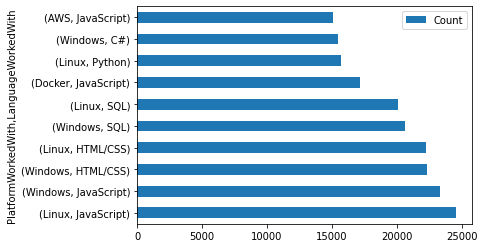

In [61]:
df19_plat_lang[df19_plat_lang.Count > df19_plat_lang.Count.quantile(0.980)].set_index([ 'PlatformWorkedWith', 'LanguageWorkedWith']).plot.barh()

### 2019

### platform-database

In [62]:
df19_plat_db = df19_6col[["DatabaseWorkedWith","PlatformWorkedWith"]]
df19_plat_db = df19_plat_db.assign(PlatformWorkedWith=df19_plat_db['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df19_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Android
1,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Linux
2,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,MacOS
3,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Slack
4,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Windows


In [63]:
df19_plat_db = df19_plat_db.assign(DatabaseWorkedWith=df19_plat_db['DatabaseWorkedWith'].apply(split_strip)).explode('DatabaseWorkedWith').reset_index(drop=True)
df19_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Couchbase,Android
1,MongoDB,Android
2,MySQL,Android
3,Oracle,Android
4,PostgreSQL,Android


In [64]:
df19_plat_db = pd.DataFrame({'Count' : df19_plat_db.groupby( [ 'PlatformWorkedWith', 'DatabaseWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df19_plat_db.head()

,PlatformWorkedWith,DatabaseWorkedWith,Count
120,Linux,MySQL,18682
204,Windows,MySQL,15960
202,Windows,Microsoft SQL Server,14929
123,Linux,PostgreSQL,14325
50,Docker,MySQL,11504


<AxesSubplot:ylabel='PlatformWorkedWith,DatabaseWorkedWith'>

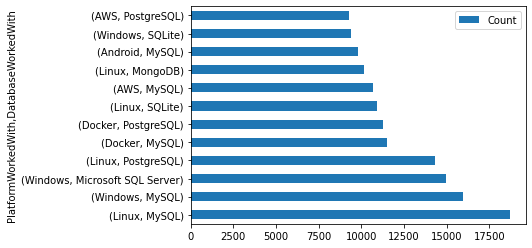

In [65]:
df19_plat_db[df19_plat_db.Count > df19_plat_db.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'DatabaseWorkedWith']).plot.barh()

### 2019

### platform-Framework

In [66]:
df19_plat_fw = df19_6col[["FrameworkWorkedWith","PlatformWorkedWith"]]
df19_plat_fw = df19_plat_fw.assign(PlatformWorkedWith=df19_plat_fw['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df19_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,Django;Express;Flask;jQuery;React.js;Spring,Android
1,Django;Express;Flask;jQuery;React.js;Spring,Linux
2,Django;Express;Flask;jQuery;React.js;Spring,MacOS
3,Django;Express;Flask;jQuery;React.js;Spring,Slack
4,Django;Express;Flask;jQuery;React.js;Spring,Windows


In [67]:
df19_plat_fw = df19_plat_fw.assign(FrameworkWorkedWith=df19_plat_fw['FrameworkWorkedWith'].apply(split_strip)).explode('FrameworkWorkedWith').reset_index(drop=True)
df19_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,Django,Android
1,Express,Android
2,Flask,Android
3,jQuery,Android
4,React.js,Android


In [68]:
df19_plat_fw= pd.DataFrame({'Count' : df19_plat_fw.groupby(['PlatformWorkedWith', 'FrameworkWorkedWith']).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df19_plat_fw.head()

,PlatformWorkedWith,FrameworkWorkedWith,Count
0,Windows,jQuery,15956
1,Linux,jQuery,14483
2,Windows,ASP.NET,12085
3,Windows,Angular/Angular.js,9966
4,Linux,React.js,9508


<AxesSubplot:ylabel='PlatformWorkedWith,FrameworkWorkedWith'>

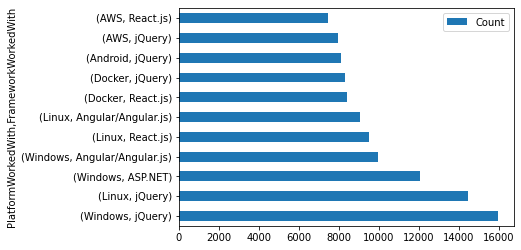

In [69]:
df19_plat_fw[df19_plat_fw.Count > df19_plat_fw.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'FrameworkWorkedWith']).plot.barh()

### 2019

### platform-devtype

In [70]:
df19_plat_dt = df19_6col[["DevType","PlatformWorkedWith"]]
df19_plat_dt = df19_plat_dt.assign(PlatformWorkedWith=df19_plat_dt['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df19_plat_dt.head()

,DevType,PlatformWorkedWith
0,"Academic researcher;Developer, desktop or ente...",Android
1,"Academic researcher;Developer, desktop or ente...",Linux
2,"Academic researcher;Developer, desktop or ente...",MacOS
3,"Academic researcher;Developer, desktop or ente...",Slack
4,"Academic researcher;Developer, desktop or ente...",Windows


In [71]:
df19_plat_dt = df19_plat_dt.assign(DevType=df19_plat_dt['DevType'].apply(split_strip)).explode('DevType').reset_index(drop=True)
df19_plat_dt.head()

,DevType,PlatformWorkedWith
0,Academic researcher,Android
1,"Developer, desktop or enterprise applications",Android
2,"Developer, full-stack",Android
3,"Developer, mobile",Android
4,Academic researcher,Linux


In [72]:
df19_plat_dt= pd.DataFrame({'Count' : df19_plat_dt.groupby( [ 'PlatformWorkedWith', 'DevType'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df19_plat_dt.head()

,PlatformWorkedWith,DevType,Count
203,Linux,"Developer, full-stack",19477
347,Windows,"Developer, full-stack",18817
199,Linux,"Developer, back-end",18693
343,Windows,"Developer, back-end",16421
83,Docker,"Developer, full-stack",13866


<AxesSubplot:ylabel='PlatformWorkedWith,DevType'>

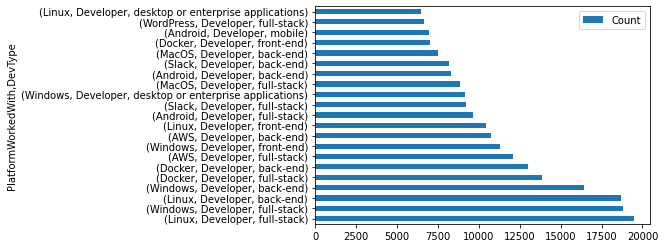

In [73]:
df19_plat_dt[df19_plat_dt.Count > df19_plat_dt.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'DevType']).plot.barh()

### 2020 and data preparation

Dataframes are suffixed with year number plus underscore and number of selected columns. 

This means 'df20_6col' means dataframe from 2020 and selecting 6 interesting columns needed to answer the question.

Column 'WebframeWorkedWith' is renamed to 'FrameworkWorkedWith' to keep names consistent.

In [74]:
df20_6col =df20.dropna(subset=['Respondent', 'DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'WebframeWorkedWith', 'DatabaseWorkedWith'], axis=0)
df20_6col = df20_6col[[ 'Respondent', 'DevType', 'PlatformWorkedWith', 'LanguageWorkedWith', 'WebframeWorkedWith', 'DatabaseWorkedWith']]

df20_6col.rename(columns={'WebframeWorkedWith':'FrameworkWorkedWith'}, inplace=True)
df20_6col.head()

,Respondent,DevType,PlatformWorkedWith,LanguageWorkedWith,FrameworkWorkedWith,DatabaseWorkedWith
0,1,"Developer, desktop or enterprise applications;...",Windows,C#;HTML/CSS;JavaScript,ASP.NET;ASP.NET Core,Elasticsearch;Microsoft SQL Server;Oracle
7,8,"Developer, back-end;Developer, desktop or ente...",Docker,Python;SQL,Flask,MariaDB;MySQL;Redis
9,10,"Database administrator;Developer, full-stack;D...",Android;Linux;Raspberry Pi;Windows,HTML/CSS;Java;JavaScript;Python;SQL,Flask;jQuery,Microsoft SQL Server
10,11,"Developer, back-end;Developer, desktop or ente...",AWS;Heroku;iOS,C#;JavaScript;Swift,Angular;Angular.js;Django;React.js,Firebase;MongoDB;PostgreSQL;SQLite
13,14,"Developer, desktop or enterprise applications;...",Google Cloud Platform;Windows,HTML/CSS;JavaScript;SQL;TypeScript,Angular;Vue.js,Firebase;Microsoft SQL Server


### 2020

### platform-language

In [75]:
df20_plat_lang = df20_6col[["LanguageWorkedWith","PlatformWorkedWith"]]
df20_plat_lang = df20_plat_lang.assign(PlatformWorkedWith=df20_plat_lang['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df20_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,C#;HTML/CSS;JavaScript,Windows
1,Python;SQL,Docker
2,HTML/CSS;Java;JavaScript;Python;SQL,Android
3,HTML/CSS;Java;JavaScript;Python;SQL,Linux
4,HTML/CSS;Java;JavaScript;Python;SQL,Raspberry Pi


In [76]:
df20_plat_lang = df20_plat_lang.assign(LanguageWorkedWith=df20_plat_lang['LanguageWorkedWith'].apply(split_strip)).explode('LanguageWorkedWith').reset_index(drop=True)
df20_plat_lang.head()

,LanguageWorkedWith,PlatformWorkedWith
0,C#,Windows
1,HTML/CSS,Windows
2,JavaScript,Windows
3,Python,Docker
4,SQL,Docker


In [77]:
df20_plat_lang = pd.DataFrame({'Count' : df20_plat_lang.groupby( [ 'PlatformWorkedWith', 'LanguageWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df20_plat_lang.head()

,PlatformWorkedWith,LanguageWorkedWith,Count
210,Linux,JavaScript,15342
335,Windows,JavaScript,14503
207,Linux,HTML/CSS,13619
332,Windows,HTML/CSS,13528
345,Windows,SQL,12844


<AxesSubplot:ylabel='PlatformWorkedWith,LanguageWorkedWith'>

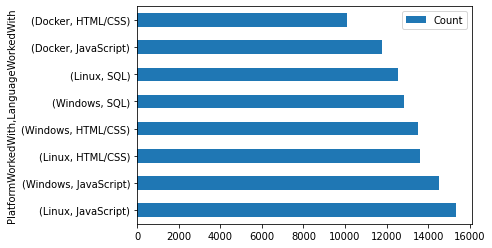

In [78]:
df20_plat_lang[df20_plat_lang.Count > df20_plat_lang.Count.quantile(0.980)].set_index([ 'PlatformWorkedWith', 'LanguageWorkedWith']).plot.barh()

### 2020

### platform-database

In [79]:
df20_plat_db = df20_6col[["DatabaseWorkedWith","PlatformWorkedWith"]]
df20_plat_db = df20_plat_db.assign(PlatformWorkedWith=df20_plat_db['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df20_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Elasticsearch;Microsoft SQL Server;Oracle,Windows
1,MariaDB;MySQL;Redis,Docker
2,Microsoft SQL Server,Android
3,Microsoft SQL Server,Linux
4,Microsoft SQL Server,Raspberry Pi


In [80]:
df20_plat_db = df20_plat_db.assign(DatabaseWorkedWith=df20_plat_db['DatabaseWorkedWith'].apply(split_strip)).explode('DatabaseWorkedWith').reset_index(drop=True)
df20_plat_db.head()

,DatabaseWorkedWith,PlatformWorkedWith
0,Elasticsearch,Windows
1,Microsoft SQL Server,Windows
2,Oracle,Windows
3,MariaDB,Docker
4,MySQL,Docker


In [81]:
df20_plat_db = pd.DataFrame({'Count' : df20_plat_db.groupby( [ 'PlatformWorkedWith', 'DatabaseWorkedWith'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df20_plat_db.head()

,PlatformWorkedWith,DatabaseWorkedWith,Count
121,Linux,MySQL,11686
191,Windows,MySQL,10005
123,Linux,PostgreSQL,9333
189,Windows,Microsoft SQL Server,9324
51,Docker,MySQL,8068


<AxesSubplot:ylabel='PlatformWorkedWith,DatabaseWorkedWith'>

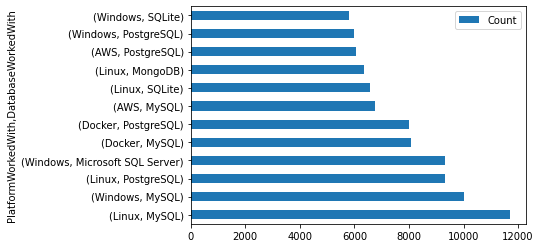

In [82]:
df20_plat_db[df20_plat_db.Count > df20_plat_db.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'DatabaseWorkedWith']).plot.barh()

### 2020

### platform-Framework

In [83]:
df20_plat_fw = df20_6col[["FrameworkWorkedWith","PlatformWorkedWith"]]
df20_plat_fw = df20_plat_fw.assign(PlatformWorkedWith=df20_plat_fw['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df20_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,ASP.NET;ASP.NET Core,Windows
1,Flask,Docker
2,Flask;jQuery,Android
3,Flask;jQuery,Linux
4,Flask;jQuery,Raspberry Pi


In [84]:
df20_plat_fw = df20_plat_fw.assign(FrameworkWorkedWith=df20_plat_fw['FrameworkWorkedWith'].apply(split_strip)).explode('FrameworkWorkedWith').reset_index(drop=True)
df20_plat_fw.head()

,FrameworkWorkedWith,PlatformWorkedWith
0,ASP.NET,Windows
1,ASP.NET Core,Windows
2,Flask,Docker
3,Flask,Android
4,jQuery,Android


In [85]:
df20_plat_fw= pd.DataFrame({'Count' : df20_plat_fw.groupby(['PlatformWorkedWith', 'FrameworkWorkedWith']).size()}).reset_index().sort_values(by=['Count'], ascending=False).reset_index(drop=True)
df20_plat_fw.head()

,PlatformWorkedWith,FrameworkWorkedWith,Count
0,Windows,jQuery,8957
1,Linux,jQuery,8283
2,Linux,React.js,6885
3,Windows,ASP.NET,6504
4,Docker,React.js,6291


<AxesSubplot:ylabel='PlatformWorkedWith,FrameworkWorkedWith'>

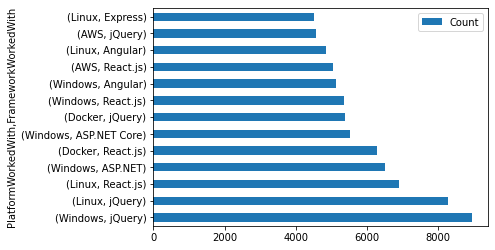

In [86]:
df20_plat_fw[df20_plat_fw.Count > df20_plat_fw.Count.quantile(0.95)].set_index([ 'PlatformWorkedWith', 'FrameworkWorkedWith']).plot.barh()

### 2020

### platform-devtype

In [87]:
df20_plat_dt = df20_6col[["DevType","PlatformWorkedWith"]]
df20_plat_dt = df20_plat_dt.assign(PlatformWorkedWith=df20_plat_dt['PlatformWorkedWith'].apply(split_strip)).explode('PlatformWorkedWith').reset_index(drop=True)
df20_plat_dt.head()

,DevType,PlatformWorkedWith
0,"Developer, desktop or enterprise applications;...",Windows
1,"Developer, back-end;Developer, desktop or ente...",Docker
2,"Database administrator;Developer, full-stack;D...",Android
3,"Database administrator;Developer, full-stack;D...",Linux
4,"Database administrator;Developer, full-stack;D...",Raspberry Pi


In [88]:
df20_plat_dt = df20_plat_dt.assign(DevType=df20_plat_dt['DevType'].apply(split_strip)).explode('DevType').reset_index(drop=True)
df20_plat_dt.head()

,DevType,PlatformWorkedWith
0,"Developer, desktop or enterprise applications",Windows
1,"Developer, full-stack",Windows
2,"Developer, back-end",Docker
3,"Developer, desktop or enterprise applications",Docker
4,"Developer, game or graphics",Docker


In [89]:
df20_plat_dt = pd.DataFrame({'Count' : df20_plat_dt.groupby( [ 'PlatformWorkedWith', 'DevType'] ).size()}).reset_index().sort_values(by=['Count'], ascending=False)
df20_plat_dt.head()

,PlatformWorkedWith,DevType,Count
195,Linux,"Developer, full-stack",12530
191,Linux,"Developer, back-end",12508
310,Windows,"Developer, full-stack",11976
306,Windows,"Developer, back-end",11066
80,Docker,"Developer, full-stack",9867


<AxesSubplot:ylabel='PlatformWorkedWith,DevType'>

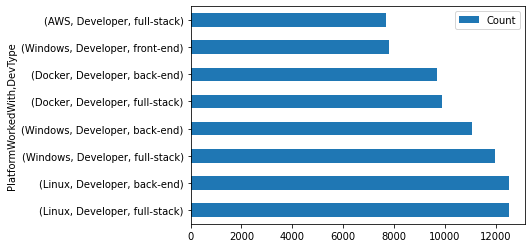

In [90]:
df20_plat_dt[df20_plat_dt.Count > df20_plat_dt.Count.quantile(0.98)].set_index([ 'PlatformWorkedWith', 'DevType']).plot.barh()

## Answer 4<a name="a4"></a>:

In [91]:
df20_plat_dt[df20_plat_dt.Count > df20_plat_dt.Count.quantile(0.98)].set_index([ 'PlatformWorkedWith', 'DevType']).head(1)


,,Count
PlatformWorkedWith,DevType,
Linux,"Developer, full-stack",12530


In [98]:
pd.DataFrame({'2020' : df20_plat_dt.iloc[0,:], '2019' : df19_plat_dt.iloc[0,:], '2018' : df18_plat_dt.iloc[0,:], '2017' : df17_plat_dt.iloc[0,:]})

,2020,2019,2018,2017
PlatformWorkedWith,Linux,Linux,Linux,Amazon Web Services (AWS)
DevType,"Developer, full-stack","Developer, full-stack",Back-end developer,Web developer
Count,12530,19477,15308,4204
